In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz

from IPython.display import Image


%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

<Axes: ylabel='count'>

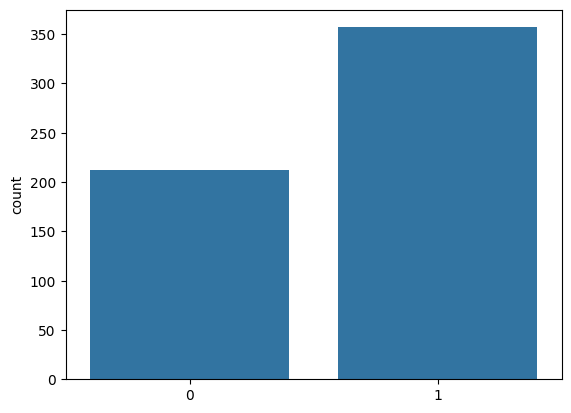

In [6]:
sns.countplot(x=cancer['target'])

In [7]:
from sklearn.model_selection import train_test_split

X=cancer['data']
y=cancer['target']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth = 5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [9]:
dt.score(X_test, y_test)

0.9122807017543859

In [10]:
y_pred = dt.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred)

0.9122807017543859

In [11]:
print(confusion_matrix(y_test, y_pred))

[[33  8]
 [ 2 71]]


In [12]:
single_sample = X_test[0]
dt.predict([single_sample])


array([0])

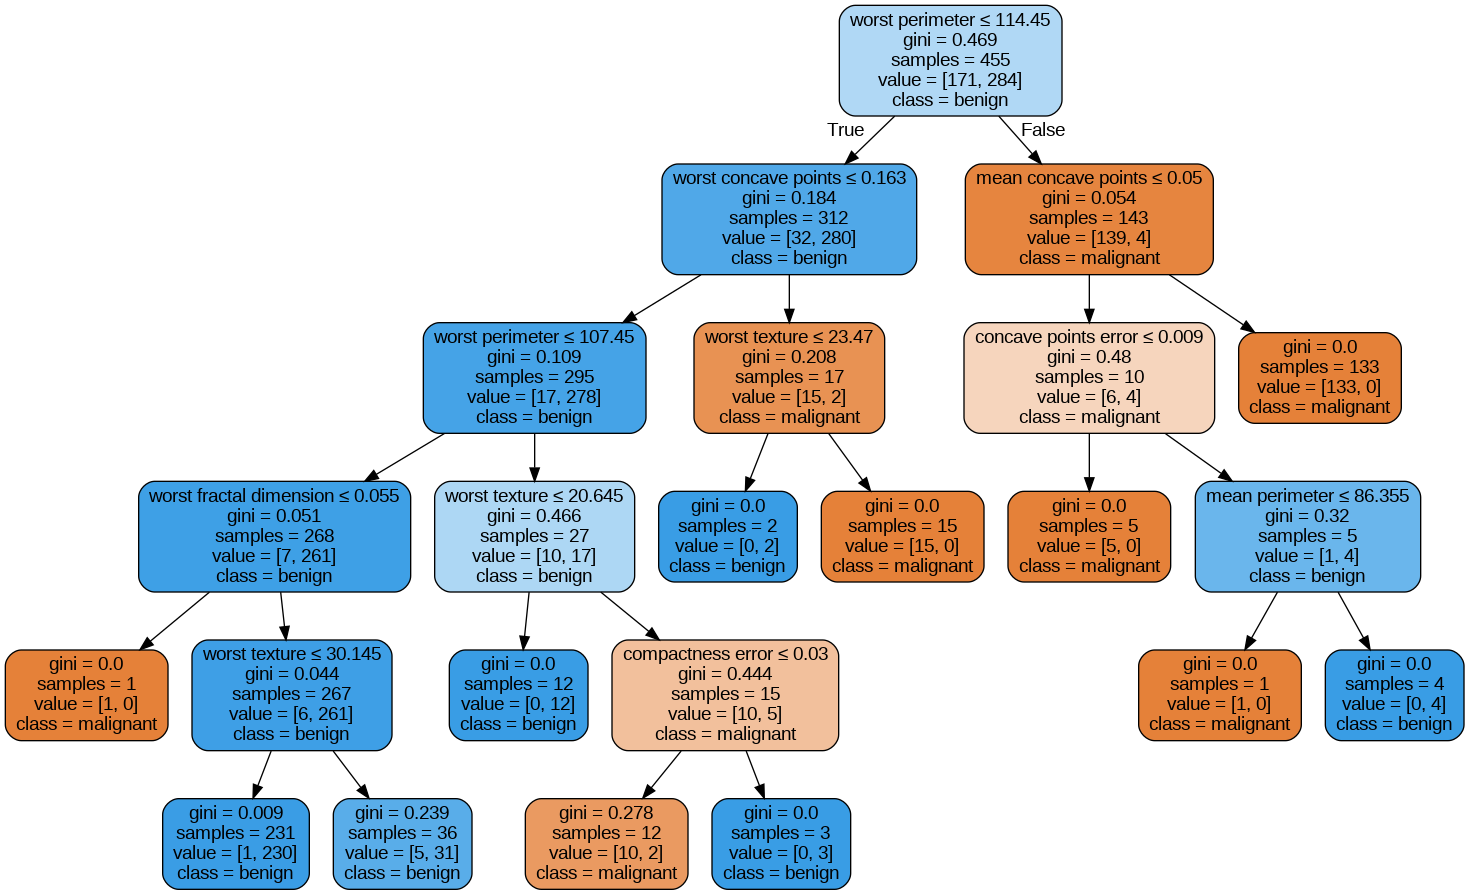

Decision tree visualized (see output above).


In [13]:
dot_data = export_graphviz(
     dt,
     out_file = None,
     feature_names=cancer.feature_names,
     class_names=cancer.target_names,
     filled=True,
     rounded=True,
     special_characters=True,
 )

graph = graphviz.Source(dot_data)


if 'google.colab' in str (get_ipython()):
    display(Image(graph.pipe(format='png')))



else:
    graph

graph.render("breast_cancer_tree")


print('Decision tree visualized (see output above).')